In [92]:
import tweepy
import pandas as pd
import numpy as np 
import re 
import os
import random
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statistics import mode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [93]:
# Open dataset 
dataset = pd.read_csv('./resource/labeled_data.csv')
# class: 0 - hate speech 1 - offensive language 2 - neither
dt_transformed = dataset[['class', 'tweet']]


Training table have 21065 rows and 2 column 
Test table have 3718 rows and 2 column



<AxesSubplot:>

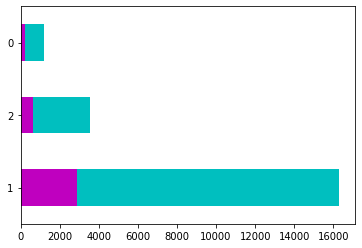

In [114]:
df_train, df_test = train_test_split(dt_transformed, test_size = 0.15, random_state = 42, stratify=dt_transformed['class'])
print(f"""
Training table have {df_train.shape[0]} rows and {df_train.shape[1]} column 
Test table have {df_test.shape[0]} rows and {df_test.shape[1]} column
""")
df_train['class'].value_counts().plot(kind='barh',color='c');df_test['class'].value_counts().plot(kind='barh',color='m')

In [145]:
# Preciso fazer um tratamento dos twitters
def processing_twitter(data):
    all_stopwords = stopwords.words('english')
    corpus = []
    for t in data:
        p_data = re.sub("^RT.", "", t)  # removing RTT
        p_data = re.sub("@[0-9A-za-z:]+", "", p_data)  # removing @user
        p_data = re.sub("https?://[A-Za-z0-9./&#]+", "", p_data)  # removing http links
        p_data = re.sub("&#[0-9;]+", " ", p_data) # removing emojis
        p_data = p_data.lower()
        p_data = p_data.split()
        ps = PorterStemmer()
        p_data = [ps.stem(word) for word in p_data if not word in set(all_stopwords) if len(word) > 2]
        p_data = ' '.join(p_data)
        print
        corpus.append(p_data)
        
        return np.array(corpus)
p_df_train = processing_twitter(df_train['tweet'].values)

In [148]:
for x in p_df_train:
    print(x)
    
    

that' nice color combo too, love blue yellow.


TypeError: len() takes exactly one argument (0 given)